# Statistics for all types of editors

### Similar to Sarasua et al. paper we investigate maximum gaps of inactivty for Wikidata editors

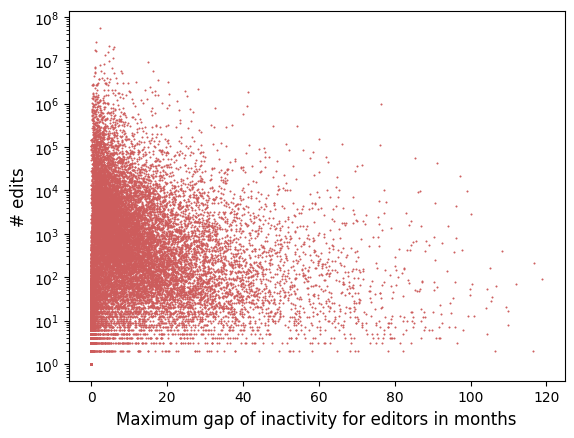

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_v3=pd.read_csv('editors_mag_gap.csv',encoding='utf-8')
df1=df_v3.loc[df_v3['acount_age']>0]
plt.plot(df1['max_gap'],df1['number_of_edits'], 'D', color='indianred', mew=0.8 ,ms=0.6)
plt.xlabel("Maximum gap of inactivity for editors in months", fontsize=12)
plt.yscale('log')
plt.ylabel('# edits', fontsize=12)
# plt.show()
plt.savefig('scaterplot_gap_edits.png',bbox_inches='tight',dpi=300)

### Editors' stats and graphs

In [5]:
import pandas as pd

df=pd.read_csv('registered_editors_all_stats_v6_IDs.csv',encoding='utf-8')
df_r=df.loc[df['username_type']=='registered']
df_b=df.loc[df['username_type']=='bot']
df_unr=df.loc[(df['username_type']!='registered')&(df['username_type']!='bot')]



In [11]:
print('number of posts for all editors: ', sum(df['total_posts']))
print('number of posts for registered: ', sum(df_r['total_posts']))
print('number of posts for unregistered: ', sum(df_unr['total_posts']))
print('number of posts for bots: ', sum(df_b['total_posts']))


number of posts for all editors:  1397565
number of posts for registered:  1012483
number of posts for unregistered:  62976
number of posts for bots:  322106


In [3]:
import pandas as pd
df_r_feat=pd.read_csv('registered_editors_all_stats_v6_IDs.csv', encoding='utf-8')
print('number of revisions for registered editors: ', sum(df_r_feat['number_of_edits']))
print('max number of edits: ', max(df_r_feat['number_of_edits']))

number of revisions for registered editors:  750126203
max number of edits:  55480224


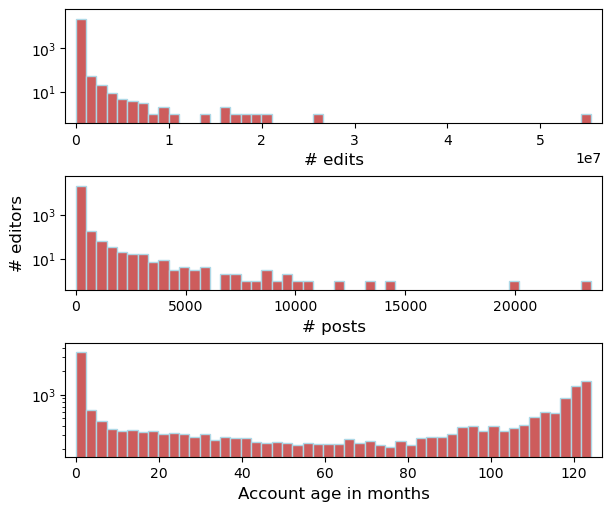

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(6, 5),constrained_layout = True)
# sns.color_palette("mako")
# plt.subplot(311)
values1, bins1, bars1 =ax1.hist(df_r_feat['number_of_edits'], bins=50,color='indianred', ec='lightblue')#,color='inidanred')#, ec="indianred")
ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel('# edits',fontsize=12)
# ax1.bar_label(bars1, fontsize=6, color='teal')
ax1.margins(x=0.02, y=0.1)
 
# plt.subplot(312)
values2, bins2, bars2 =ax2.hist(df_r_feat['total_posts'], bins=50, color='indianred', ec='lightblue')
ax2.set_yscale('log')
ax2.set_xlabel('# posts',fontsize=12)
# ax2.bar_label(bars2, fontsize=6, color='teal')
ax2.margins(x=0.02, y=0.1)

# plt.subplot(313)
df1=df_r_feat.loc[df_r_feat['acount_age']>0]
values3, bins3, bars3 =ax3.hist(df1['acount_age'], bins=50, color='indianred', ec='lightblue')
ax3.set_yscale('log')
ax3.set_xlabel("Account age in months",fontsize=12)
# ax3.bar_label(bars3, fontsize=6, color='teal')
ax3.margins(x=0.02, y=0.1)
# 
# 
ax2.set_ylabel("# editors",fontsize=12)

 
# plt.suptitle("Plotting Multiple Graphs")
# plt.show()


  
# # # plt.hist(df_r_feat['number_of_edits'],bins=50, color='teal', ec="darkmagenta")
# plt.yscale('log')
# plt.xscale('log')
# # plt.xlabel('Number of edits')
# plt.ylabel('Number of editors')
plt.savefig('num_edits_editors_posts_age.png',bbox_inches='tight',dpi=300)


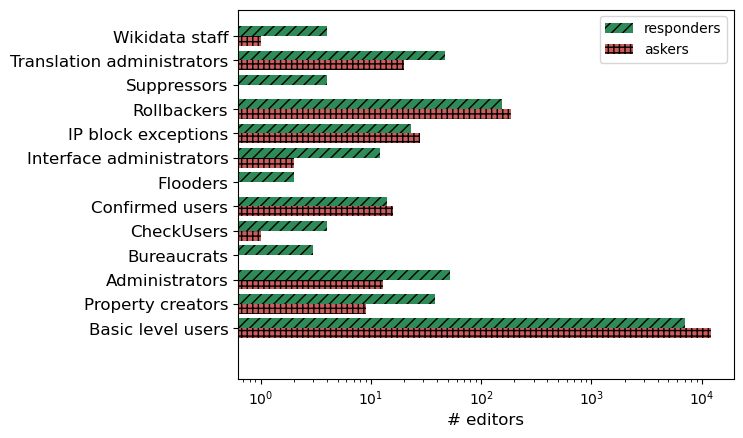

In [32]:
import numpy as np
from matplotlib.patches import Patch

df=pd.read_csv('registered_editors_all_stats_v6_IDs.csv',encoding='utf-8')
df1=df.loc[df['acount_age']>0]

# dataset-1
x1 = df1.loc[df1['talking_type']==1]
 

 
# dataset2
x2 = df1.loc[df1['talking_type']==0]
 
X=['Basic level users','Property creators', 'Administrators','Bureaucrats','CheckUsers', 'Confirmed users','Flooders', 'Interface administrators','IP block exceptions','Rollbackers', 'Suppressors', 'Translation administrators', 'Wikidata staff'] 

# fig, (ax1, ax2) = plt.subplots(2, 1,constrained_layout = True,figsize=(9, 9))

# ax1.set_figheight(10)
# ax1.set_figwidth(5)
n, bins, patches =plt.hist([x1['rights'],x2['rights']],bins=np.arange(15)-0.5, color=['indianred','seagreen'],orientation='horizontal')
 
# plt.hist(x2['rights'],bins=15)
plt.xscale('log')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13],X,fontsize=12)
# ax1.set_ylabel('#posts',fontsize=16)


plt.xlabel("# editors",fontsize=12)


patch_1 = Patch(fill=True, label='responders', hatch='///',facecolor='seagreen')
patch_2 = Patch(fill=True, label='askers', hatch='+++',facecolor='indianred')
# plt.legend(['askers','responders'],fontsize='10')
plt.legend(handles=[patch_1, patch_2], loc='upper right')

hatches = [ '+++', '///']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)

plt.savefig('rights_talking.png',bbox_inches='tight',dpi=300)

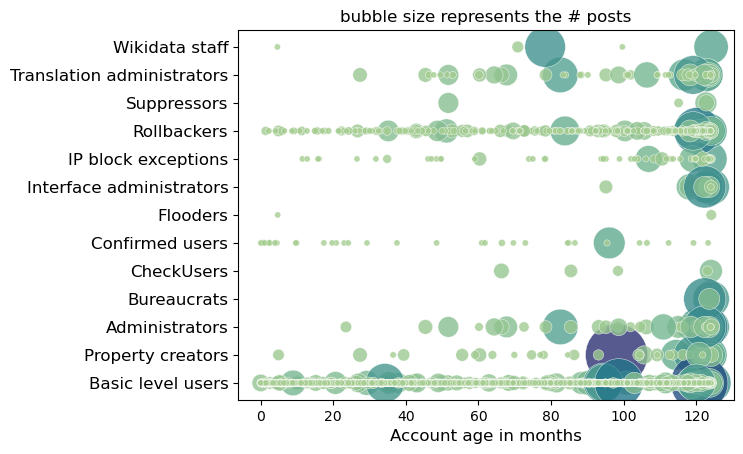

In [35]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

data1=pd.read_csv('registered_editors_all_stats_v6_IDs.csv',encoding='utf-8')
data=data1.loc[data1['acount_age']>0]



# use the scatterplot function to build the bubble map
scatter=sns.scatterplot(data=data, x="acount_age", y="rights", size=data['total_posts'],
                c=data['total_posts'],cmap='crest' , alpha=0.8, edgecolors="grey", sizes=(20, 2000),
                legend=False)
# cmap="PRGn"

plt.xlabel('Account age in months',fontsize=12)
plt.tick_params(left = True, right = False ,labelright=False, labelleft = True ,
                labelbottom = True, bottom = True)
X=['Basic level users','Property creators', 'Administrators','Bureaucrats','CheckUsers', 'Confirmed users','Flooders', 'Interface administrators','IP block exceptions','Rollbackers', 'Suppressors', 'Translation administrators', 'Wikidata staff'] 
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13],X,fontsize=12)
plt.ylabel('')

plt.title('bubble size represents the # posts')

# show the graph
plt.savefig('rights_age_posts.png',bbox_inches='tight',dpi=300)